In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from k_nearest_neighbors import KNearestNeighbor

In [2]:
df = pd.read_csv('datasets/results.csv', index_col=[0])
df

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
0,65,10,59,3,71,37,245,0,3
1,94,56,4,67,91,50,362,1,1
2,7,85,76,99,60,25,352,0,2
3,88,46,59,94,52,38,377,1,1
4,39,81,37,38,6,54,255,1,3
...,...,...,...,...,...,...,...,...,...
995,55,89,68,58,13,13,296,0,2
996,42,62,25,87,51,68,335,1,2
997,9,83,70,14,11,78,265,0,3
998,23,82,31,42,84,52,314,0,2


We can notice that total mark doesn't matter. So, we will work in 6-dimensional space

In [3]:
df.loc[[4, 997]]

,Hindi,English,Science,Maths,History,Geograpgy,Total,Results,Div
4,39,81,37,38,6,54,255,1,3
997,9,83,70,14,11,78,265,0,3


We'll predict result (0 or 1 -- binary classification)

In [4]:
model = KNearestNeighbor()
k = 5
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_data = train_df.to_numpy()[:, :6]
train_labels = train_df['Results'].to_numpy()
test_data = test_df.to_numpy()[:, :6]
test_labels = test_df['Results'].to_numpy()

In [5]:
model.fit(train_data, train_labels)
start0 = time.time()
predict = model.predict(test_data, k) 
end0 = time.time()
start1 = time.time()
predict = model.predict(test_data, k, 1) 
end1 = time.time()
start2 = time.time()
predict = model.predict(test_data, k, 2) 
end2 = time.time()
print(end0 - start0)
print(end1 - start1)
print(end2 - start2)

0.013767480850219727
0.0
0.27744507789611816


In [6]:
accuracy_score(test_labels, predict)

0.89

In [7]:
digits = datasets.load_digits()

In [8]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

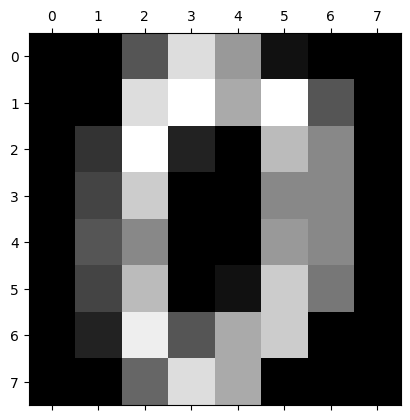

In [9]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [10]:
digits.target.shape

(1797,)

In [11]:
digits.images.shape

(1797, 8, 8)

In [12]:
X, y = datasets.load_digits(return_X_y=True)

In [13]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
X.shape

(1797, 64)

In [16]:
y.shape

(1797,)

In [17]:
y = np.array([y])

In [18]:
y.shape

(1, 1797)

In [19]:
data = np.concatenate((X, y.T), axis=1)
data.shape

(1797, 65)

In [20]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  8.],
       [ 0.,  0.,  2., ...,  0.,  0.,  9.],
       [ 0.,  0., 10., ...,  1.,  0.,  8.]])

In [21]:
df = pd.DataFrame(data, dtype=np.int64)
df.rename(columns={64:"Digit"}, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digit
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0,0,4,10,13,6,0,0,0,1,...,0,0,0,2,14,15,9,0,0,9
1793,0,0,6,16,13,11,1,0,0,0,...,0,0,0,6,16,14,6,0,0,0
1794,0,0,1,11,15,1,0,0,0,0,...,0,0,0,2,9,13,6,0,0,8
1795,0,0,2,10,7,0,0,0,0,0,...,0,0,0,5,12,16,12,0,0,9


In [22]:
train, test = train_test_split(df, test_size=100, random_state=42)

In [23]:
train.shape

(1697, 65)

In [24]:
test.shape

(100, 65)

In [25]:
train

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digit
239,0,0,0,0,15,9,0,0,0,0,...,0,0,0,0,1,15,5,0,0,4
1087,0,0,9,16,16,15,4,0,0,8,...,0,0,0,14,16,16,8,0,0,3
1738,0,0,7,12,16,9,0,0,0,4,...,0,0,0,10,11,4,0,0,0,5
1558,0,0,3,11,13,15,3,0,0,4,...,0,0,0,2,12,14,3,0,0,3
210,0,0,0,0,7,14,7,0,0,0,...,0,0,0,0,0,8,15,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,1,13,16,16,12,1,0,0,12,...,0,0,1,14,16,16,11,1,0,3
1294,0,3,15,16,15,3,0,0,0,3,...,0,0,3,16,5,0,0,0,0,7
860,0,0,9,16,16,13,1,0,0,0,...,0,0,0,9,14,16,16,2,0,2
1459,0,0,1,13,16,10,0,0,0,0,...,0,0,0,1,15,7,0,0,0,7


In [26]:
test

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Digit
1245,0,0,0,7,12,0,0,0,0,0,...,2,0,0,0,9,14,14,5,0,6
220,0,0,11,16,8,0,0,0,0,6,...,0,0,0,13,16,11,1,0,0,9
1518,0,0,8,15,12,4,0,0,0,5,...,0,0,0,13,16,15,8,0,0,3
438,0,0,2,12,12,12,9,2,0,0,...,0,0,0,3,15,3,0,0,0,7
1270,0,2,13,16,10,0,0,0,0,6,...,0,0,3,15,16,16,10,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,0,0,7,13,3,0,0,0,0,0,...,3,0,0,6,15,6,9,9,1,2
589,0,0,6,11,13,6,0,0,0,7,...,0,0,0,6,14,15,12,0,0,9
701,0,0,0,9,15,6,0,0,0,0,...,0,0,0,0,9,13,5,0,0,0
111,0,0,1,10,9,0,0,0,0,0,...,0,0,0,0,10,13,0,0,0,4


In [27]:
train_d = train.to_numpy()[:, :-1]
train_d

array([[ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  9, ...,  8,  0,  0],
       [ 0,  0,  7, ...,  0,  0,  0],
       ...,
       [ 0,  0,  9, ..., 16,  2,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  1, ...,  1,  0,  0]], dtype=int64)

In [28]:
test_d = test.to_numpy()[:, :-1]
test_d

array([[ 0,  0,  0, ..., 14,  5,  0],
       [ 0,  0, 11, ...,  1,  0,  0],
       [ 0,  0,  8, ...,  8,  0,  0],
       ...,
       [ 0,  0,  0, ...,  5,  0,  0],
       [ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0]], dtype=int64)

In [29]:
train_l = train.to_numpy()[:, -1]
train_l

array([4, 3, 5, ..., 2, 7, 1], dtype=int64)

In [30]:
test_l = test.to_numpy()[:, -1]
test_l

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4], dtype=int64)

In [31]:
model.fit(train_d, train_l)

In [47]:
start0 = time.time()
predict = model.predict(test_d, k) 
end0 = time.time()
start1 = time.time()
predict = model.predict(test_d, k, 1) 
end1 = time.time()
start2 = time.time()
predict = model.predict(test_d, k, 2) 
end2 = time.time()
print(end0 - start0)
print(end1 - start1)
print(end2 - start2)
print(predict)

0.015996694564819336
0.03193950653076172
0.6096489429473877
[6. 9. 3. 7. 2. 1. 5. 2. 5. 2. 1. 9. 4. 0. 4. 2. 3. 7. 8. 8. 4. 3. 9. 7.
 5. 6. 3. 5. 6. 3. 4. 9. 1. 4. 4. 6. 9. 4. 7. 6. 6. 9. 1. 3. 6. 1. 3. 0.
 6. 5. 5. 1. 3. 5. 6. 0. 9. 0. 0. 1. 0. 4. 5. 2. 4. 5. 7. 0. 7. 5. 9. 5.
 5. 4. 7. 0. 4. 5. 5. 9. 9. 0. 2. 3. 8. 0. 6. 4. 4. 9. 1. 2. 8. 3. 5. 2.
 9. 0. 4. 4.]


In [33]:
predict == test_l

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [34]:
accuracy_score(test_l, predict)

0.99

In [36]:
sk_model = KNeighborsClassifier(n_neighbors=5)

In [37]:
sk_model.fit(train_d, train_l)

KNeighborsClassifier()

In [38]:
sk_predict = sk_model.predict(test_d)

In [40]:
sk_predict == test_l

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [39]:
accuracy_score(test_l, sk_predict)

0.99

In [41]:
test_index = test.index

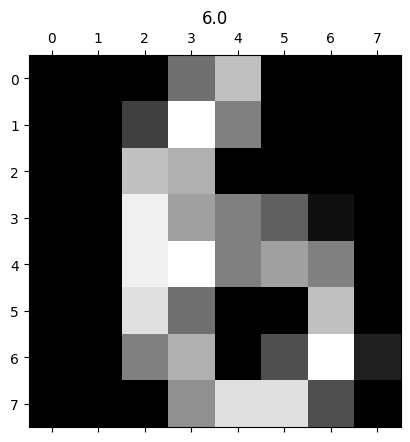

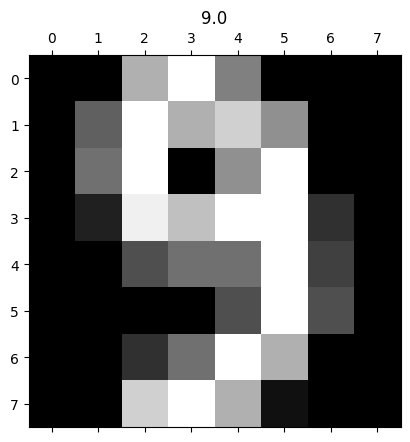

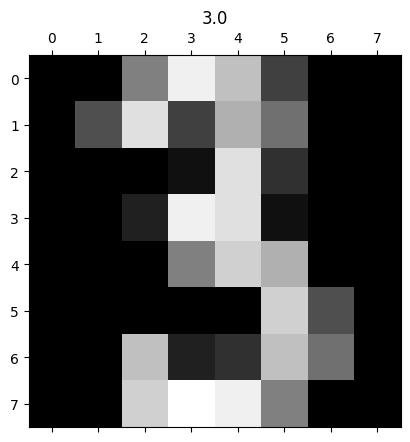

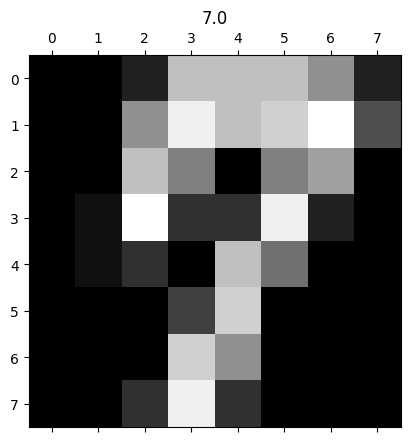

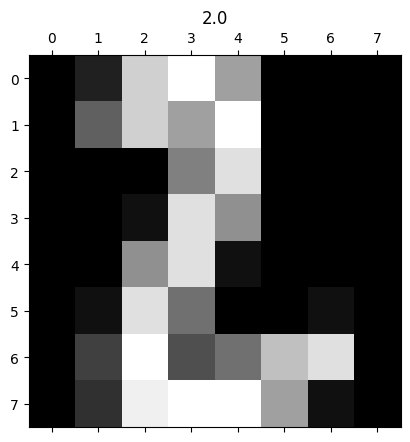

In [42]:
counter = 0
for i in test_index[:5]:
    plt.matshow(digits.images[i])
    plt.title(predict[counter])
    counter += 1


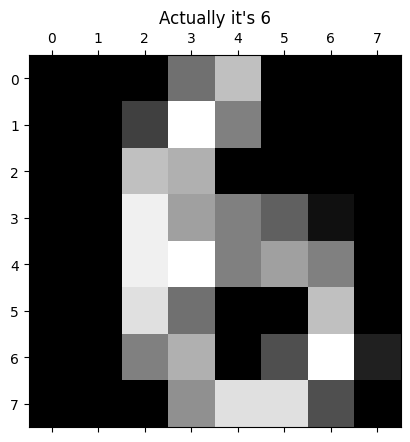

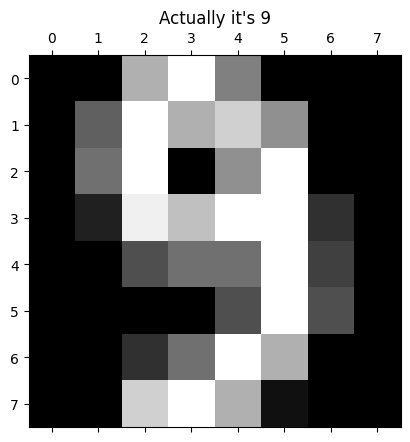

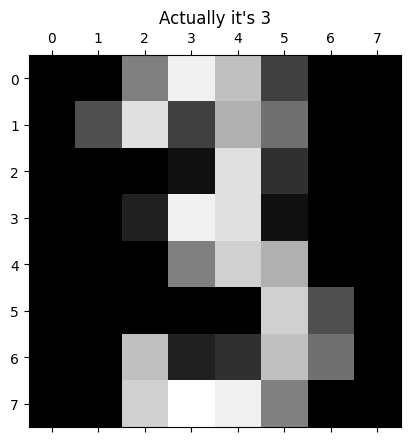

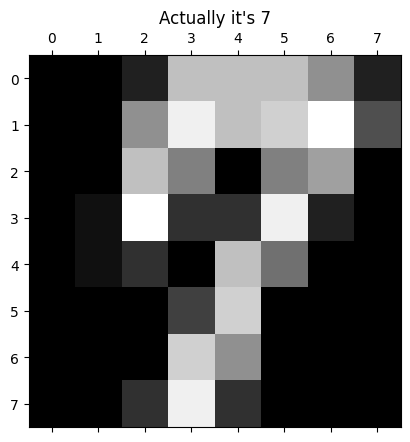

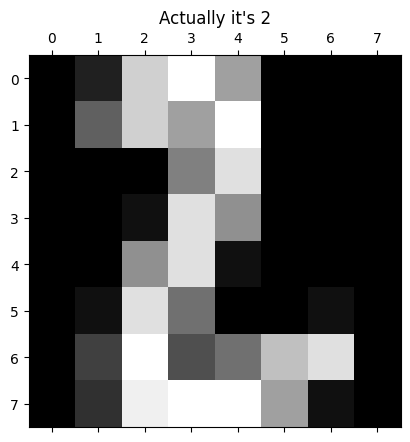

In [43]:
counter = 0
for i in test_index[:5]:
    plt.matshow(digits.images[i])
    plt.title("Actually it's " + str(test_l[counter]))
    counter += 1


In [44]:
false_predict = (predict == test_l).tolist().index(False)
false_predict

52

Text(0.5, 1.0, '3.0')

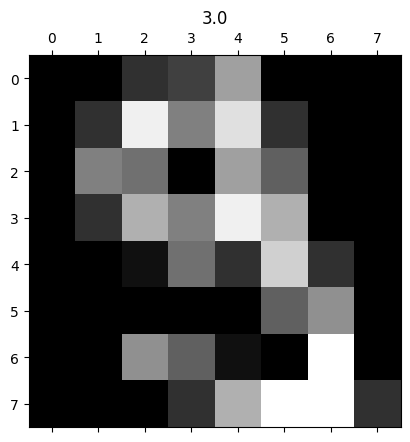

In [45]:
plt.matshow(digits.images[test_index[false_predict]])
plt.title(predict[false_predict])

Text(0.5, 1.0, "Actually it's 9")

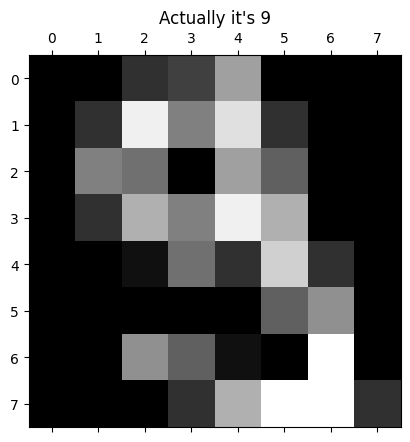

In [46]:
plt.matshow(digits.images[test_index[false_predict]])
plt.title("Actually it's " + str(test_l[false_predict]))